# Building an artificial neural network predictive model to predict house prices based on various features using the PyTorch library.

### Importing packages

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
import seaborn as sns

### Loadin dataset

In [177]:
df = pd.read_csv("kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [178]:
df1 = df.copy()

In [179]:
df1.columns.values

array(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype=object)

### Dropping identifiers

In [180]:
df1 =df1.drop(['id','zipcode'], axis=True)
df1

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509
21609,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200
21610,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007
21611,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287


### Analysing the count of not a number values in the columns

In [181]:
df1.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Visualizing the insights.

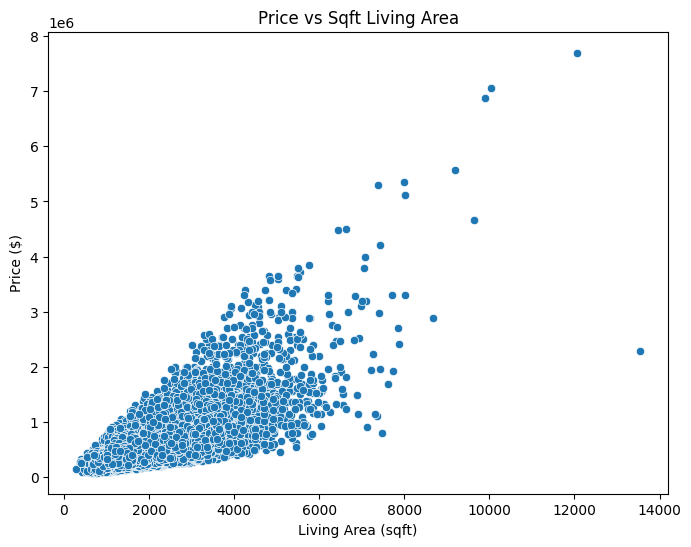

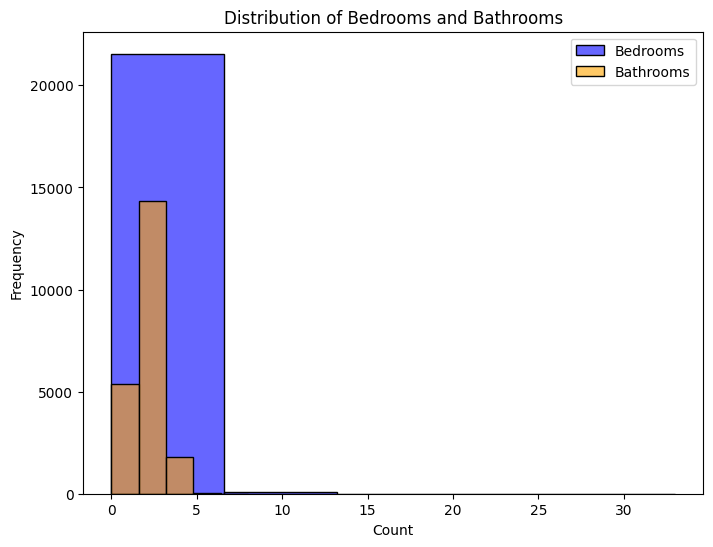

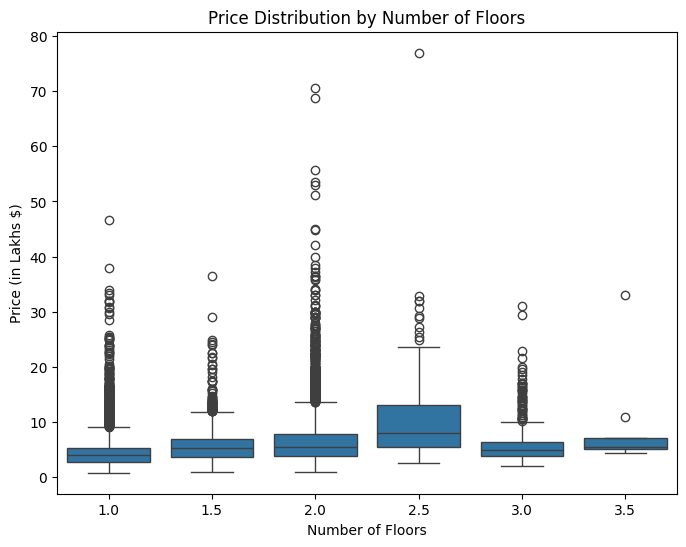

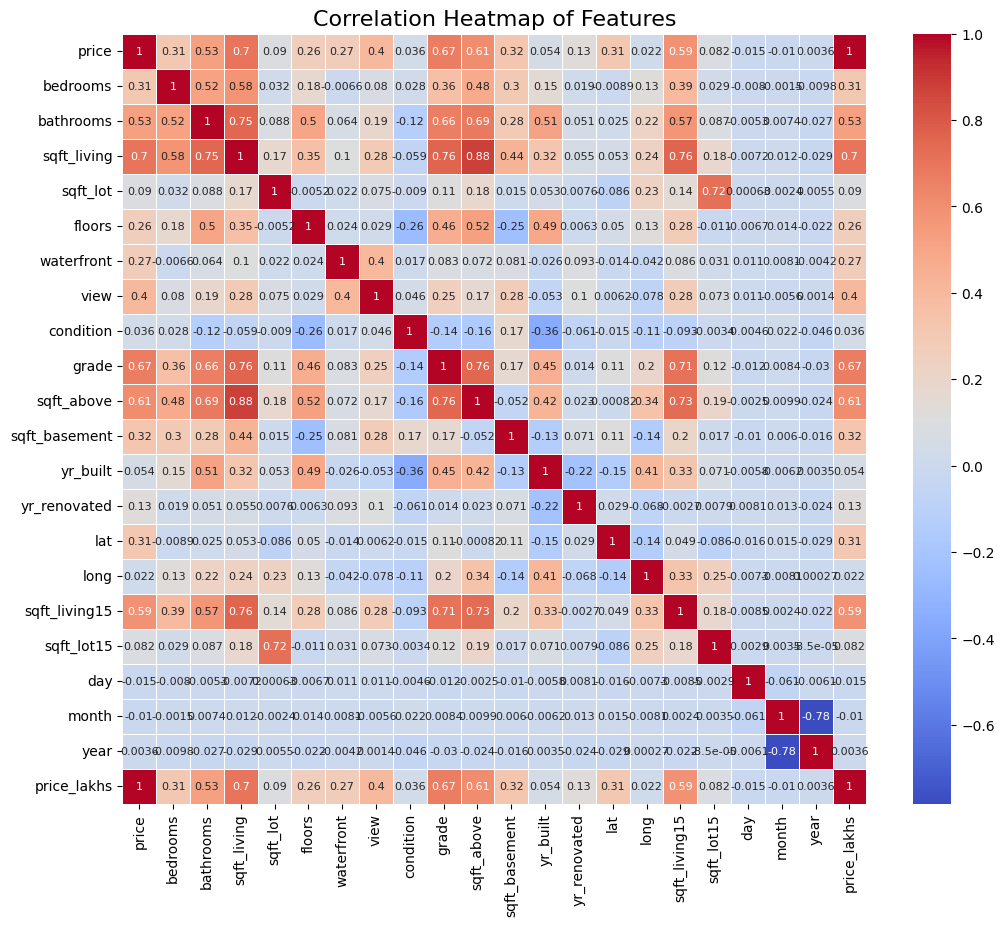

In [205]:
# Scatter Plot: Price vs Sqft Living
plt.figure(figsize=(8,6))
sns.scatterplot(x='sqft_living', y='price', data=df1)
plt.title('Price vs Sqft Living Area')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price ($)')
plt.show()

# Histogram: Bedrooms and Bathrooms
plt.figure(figsize=(8,6))
sns.histplot(df1['bedrooms'], bins=5, kde=False, color='blue', label='Bedrooms', alpha=0.6)
sns.histplot(df1['bathrooms'], bins=5, kde=False, color='orange', label='Bathrooms', alpha=0.6)
plt.title('Distribution of Bedrooms and Bathrooms')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Boxplot: Floors vs Price
# Converting the price to lakhs (hundred thousand dollars)
df1['price_lakhs'] = df1['price'] / 100000

# Boxplot: Floors vs Price in Lakhs
plt.figure(figsize=(8,6))
sns.boxplot(x='floors', y='price_lakhs', data=df1)
plt.title('Price Distribution by Number of Floors')
plt.xlabel('Number of Floors')
plt.ylabel('Price (in Lakhs $)')
plt.show()

# Heatmap: Correlation of Features
plt.figure(figsize=(12, 10)) 
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8})  
plt.title('Correlation Heatmap of Features', fontsize=16)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10)  
plt.show()

## Feature Engineering
### Converting 'date' column to datetime and extract day, month, year

In [182]:

df1['date'] = pd.to_datetime(df1['date'], format='%Y%m%dT%H%M%S')
df1['day'] = df1['date'].dt.day
df1['month'] = df1['date'].dt.month
df1['year'] = df1['date'].dt.year
df1 = df1.drop(columns=['date'])

# Selecting only numeric columns
df_numeric = df1.select_dtypes(exclude=['datetime64'])


### Initializing MinMax scaler to scale features and target between 0 and 1

In [183]:
# scaling features
feature_scaler = MinMaxScaler()
X_features = df_numeric.drop(columns=['price'])
X_scaled = feature_scaler.fit_transform(X_features)

# Scaling target
target_scaler = MinMaxScaler()
y = df_numeric[['price']]
y_scaled = target_scaler.fit_transform(y)


### Assessing the dimensions of scaled features and target

In [184]:

print("The dimensions of X are:", X_scaled.shape)
print("The dimensions of y are:", y_scaled.shape)

The dimensions of X are: (21613, 20)
The dimensions of y are: (21613, 1)


### Splitting the data into train, validation, and test sets

In [185]:
X_data, X_test, Y_data, Y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)

### Assessing the dimensions of train, validation and test sets

In [186]:
print("The shape of X_data:", X_data.shape)
print("The shape of X_test:", X_test.shape)
print("The shape of Y_data:", Y_data.shape)
print("The shape of Y_test:", Y_test.shape)

The shape of X_data: (17290, 20)
The shape of X_test: (4323, 20)
The shape of Y_data: (17290, 1)
The shape of Y_test: (4323, 1)


In [187]:
print("The shape of X_train:", X_train.shape)
print("The shape of X_val:", X_val.shape)
print("The shape of Y_train:", Y_train.shape)
print("The shape of Y_val:", Y_val.shape)

The shape of X_train: (13832, 20)
The shape of X_val: (3458, 20)
The shape of Y_train: (13832, 1)
The shape of Y_val: (3458, 1)


### Convert the NumPy arrays to PyTorch tensors

In [188]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

In [189]:
y_train_tensor = torch.tensor(Y_train, dtype=torch.float32).view(-1, 1)
y_val_tensor = torch.tensor(Y_val, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(Y_test, dtype=torch.float32).view(-1, 1)

### Verifying the shapes of the tensors

In [190]:
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_val shape:", Y_val.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (13832, 20)
X_val shape: (3458, 20)
X_test shape: (4323, 20)
Y_train shape: (13832, 1)
Y_val shape: (3458, 1)
Y_test shape: (4323, 1)


### Defining a class of Neural Network named as HousePricePredictor, creating 3 fully connected layers into the network and passing ReLU activation function.

In [191]:
class HousePricePredictor(nn.Module):
    def __init__(self, input_size):
        super(HousePricePredictor, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)  
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)  # Output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

### Create a variable named input_size and assign it the number of features from the X_train dataset. Then, create an object of the HousePricePredictor class, passing the input_size to the class. Finally, initialize the Adam optimizer with a learning rate of 0.001.

In [192]:
input_size = X_train.shape[1]
model = HousePricePredictor(input_size)
optimizer = optim.Adam(model.parameters(), lr=0.001)

### Creating a combined class for mse and mae loss function

In [193]:
class CombinedLoss(nn.Module):
    def __init__(self, alpha=0.5):
        super(CombinedLoss, self).__init__()
        self.mse_loss = nn.MSELoss()
        self.mae_loss = nn.L1Loss() #mae loss
        self.alpha = alpha

    def forward(self, predictions, targets):
        mse = self.mse_loss(predictions, targets)
        mae = self.mae_loss(predictions, targets)
        return self.alpha * mse +(1 - self.alpha) *mae


### creating an object of combinedloss class named as criterion.

In [194]:
criterion = CombinedLoss(alpha=0.5)

### Creating train function, to train the model

In [195]:
def train(model, X_train, Y_train, optimizer, criterion, num_epochs):
    model.train()

    for epoch in range(num_epochs):
        optimizer.zero_grad()

        #Forward pass
        outputs = model(X_train)
        loss = criterion(outputs, Y_train)

        #Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Calculating MSE and MAE for current epoch
        mse = nn.MSELoss()(outputs, Y_train)
        mae = nn.L1Loss()(outputs, Y_train)

        print(f'Epoch [{epoch+1}/{num_epochs}], Combined Loss: {loss.item():.4f}, MSE : {mse.item():.4f}, MAE :{mae.item():.4f}')


### Function call of train

In [196]:
train(model, X_train_tensor, y_train_tensor, optimizer, criterion, num_epochs=1000)

Epoch [1/1000], Combined Loss: 0.0968, MSE : 0.0286, MAE :0.1650
Epoch [2/1000], Combined Loss: 0.0832, MSE : 0.0222, MAE :0.1443
Epoch [3/1000], Combined Loss: 0.0705, MSE : 0.0167, MAE :0.1243
Epoch [4/1000], Combined Loss: 0.0587, MSE : 0.0123, MAE :0.1052
Epoch [5/1000], Combined Loss: 0.0478, MSE : 0.0087, MAE :0.0869
Epoch [6/1000], Combined Loss: 0.0378, MSE : 0.0060, MAE :0.0697
Epoch [7/1000], Combined Loss: 0.0292, MSE : 0.0041, MAE :0.0542
Epoch [8/1000], Combined Loss: 0.0224, MSE : 0.0030, MAE :0.0418
Epoch [9/1000], Combined Loss: 0.0185, MSE : 0.0027, MAE :0.0342
Epoch [10/1000], Combined Loss: 0.0182, MSE : 0.0030, MAE :0.0333
Epoch [11/1000], Combined Loss: 0.0210, MSE : 0.0038, MAE :0.0382
Epoch [12/1000], Combined Loss: 0.0246, MSE : 0.0046, MAE :0.0446
Epoch [13/1000], Combined Loss: 0.0269, MSE : 0.0051, MAE :0.0487
Epoch [14/1000], Combined Loss: 0.0273, MSE : 0.0051, MAE :0.0495
Epoch [15/1000], Combined Loss: 0.0262, MSE : 0.0049, MAE :0.0475
Epoch [16/1000], Co

### Creating a function to validate and test data

In [197]:
def evaluate(model, X_data, Y_data, criterion):
    model.eval()

    with torch.no_grad():
        outputs = model(X_data)
        mse = nn.MSELoss()(outputs, Y_data)
        mae = nn.L1Loss()(outputs, Y_data)
        combined_loss = criterion(outputs, Y_data)

    print(f"MSE : {mse.item():.4f}")
    print(f"MAE : {mae.item():.4f}")
    print(f"Combined Loss: {combined_loss.item():.4f}")
    return mse, mae, combined_loss


### Function call of validation set to analyse the validation result on unseen data.

In [198]:
print("Evaluating validation set")
evaluate(model, X_val_tensor, y_val_tensor, criterion)

Evaluating validation set
MSE : 0.0003
MAE : 0.0105
Combined Loss: 0.0054


(tensor(0.0003), tensor(0.0105), tensor(0.0054))

### Function call of test set to analyse the test result on unseen data.

In [199]:
print("Evaluating Test set")
evaluate(model, X_test_tensor, y_test_tensor, criterion)

Evaluating Test set
MSE : 0.0005
MAE : 0.0111
Combined Loss: 0.0058


(tensor(0.0005), tensor(0.0111), tensor(0.0058))

<h4 style="line-height:1.2; font-size: 14px;"><i>Steps for Predicting the Price of a Single House from the Given Dataset</i></h4>

<p style="line-height:1.2; font-size: 12px;"><i>1. Creating a DataFrame to store results.</i></p>
<p style="line-height:1.2; font-size: 12px;"><i>2. Iterating through the first 5 rows.</i></p>
<p style="line-height:1.2; font-size: 12px;"><i>3. Converting house features to a tensor.</i></p>
<p style="line-height:1.2; font-size: 12px;"><i>4. Using the model for prediction.</i></p>
<p style="line-height:1.2; font-size: 12px;"><i>5. As the target was scaled, inverse-transforming the predicted price.</i></p>
<p style="line-height:1.2; font-size: 12px;"><i>6. Converting the single house features back to a DataFrame for easy concatenation.</i></p>
<p style="line-height:1.2; font-size: 12px;"><i>7. Adding the predicted price and the original price to the DataFrame.</i></p>
<p style="line-height:1.2; font-size: 12px;"><i>8. Appending the results to the DataFrame.</i></p>
<p style="line-height:1.2; font-size: 12px;"><i>9. Ensuring the <b>Predicted Price</b> is formatted to 2 decimal places.</i></p>
<p style="line-height:1.2; font-size: 12px;"><i>10. Finally, printing the DataFrame with first 5 results.</i></p>


In [200]:
import IPython

results_df = pd.DataFrame()

for index in range(min(5, len(df1))):
    single_house = df1.iloc[index].drop('price')  # Dropping the target column
    single_house_scaled = feature_scaler.transform(single_house.values.reshape(1, -1))

    
    single_house_tensor = torch.tensor(single_house_scaled, dtype=torch.float32)

    
    model.eval()
    with torch.no_grad():
        prediction = model(single_house_tensor)

   
    predicted_price_original_scale = target_scaler.inverse_transform(prediction.numpy().reshape(-1, 1))

  
    single_house_df = pd.DataFrame(single_house.values.reshape(1, -1), columns=X_features.columns)

    
    single_house_df['Predicted Price'] = [round(predicted_price_original_scale[0, 0], 2)]
    single_house_df['Original Price'] = [df1.iloc[index]['price']]

    
    results_df = pd.concat([results_df, single_house_df], ignore_index=True)


results_df['Predicted Price'] = results_df['Predicted Price'].map('${:,.2f}'.format)


IPython.display.display(results_df)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names,

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_renovated,lat,long,sqft_living15,sqft_lot15,day,month,year,Predicted Price,Original Price
0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,...,0.0,47.5112,-122.257,1340.0,5650.0,13.0,10.0,2014.0,"$253,590.41",221900.0
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,...,1991.0,47.7210,-122.319,1690.0,7639.0,9.0,12.0,2014.0,"$605,136.88",538000.0
2,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,...,0.0,47.7379,-122.233,2720.0,8062.0,25.0,2.0,2015.0,"$370,137.16",180000.0
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,...,0.0,47.5208,-122.393,1360.0,5000.0,9.0,12.0,2014.0,"$412,083.19",604000.0
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,...,0.0,47.6168,-122.045,1800.0,7503.0,18.0,2.0,2015.0,"$512,204.62",510000.0


<p style="line-height:1.2; font-size: 12px;">
<b>Model Results:</b><br>

<b>Training Results:</b><br>
After 1000 epochs, the model achieved the following on the training set:<br>
Mean Squared Error (MSE): 0.0003<br>
Mean Absolute Error (MAE): 0.0097<br>
Combined Loss (MSE + MAE): 0.0050<br><br>

<b>Validation Set Results:</b><br>
Upon evaluating the model on the validation set:<br>
MSE: 0.0003<br>
MAE: 0.0105<br>
Combined Loss: 0.0054<br><br>

<b>Test Set Results:</b><br>
For the test set evaluation, the model achieved:<br>
MSE: 0.0005<br>
MAE: 0.0111<br>
Combined Loss: 0.0058
</p>

#### <p> The model demonstrates consistent performance across the training, validation, and test sets, with only slight increases in error during testing, indicating generalization with minimal overfitting.</p>